In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

"""

In [ ]:
dataset = pd.read_csv(r"HousingData.csv")
dataset.keys()

Description 

In [ ]:
print(dataset.keys())

In [ ]:
dataset.data

In [ ]:
dataset.describe()

In [ ]:
cols = dataset.keys()

preparation

In [ ]:
dataset['price'] = dataset.iloc[:,-1].values

In [ ]:
dataset['price']

In [ ]:
dataset = dataset.drop("MEDV", axis=1)

Summarise stats of data

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

MIssing values

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset = dataset.fillna(dataset.mean())
#df = dataset.interpolate()

Exploratory data analysis


Correlation

In [ ]:
dataset.corr()

In [ ]:
import seaborn as sns


In [ ]:
sns.pairplot(dataset)

In [ ]:
plt.scatter(dataset['CRIM'],dataset['price'])
plt.xlabel("crime rate")
plt.ylabel("price")

In [ ]:
plt.scatter(dataset['RM'],dataset['price'])
plt.xlabel("no of rooms")
plt.ylabel("price")

In [ ]:
sns.regplot(x="RM", y ='price',data=dataset,order=1)

In [ ]:
sns.regplot(x="CHAS", y ='price',data=dataset,order=1)

In [ ]:
dataset
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y

train test split

In [ ]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
xTrain

standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [ ]:
xTrain = scalar.fit_transform(xTrain)
xTest = scalar.fit_transform(xTest)

model training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()


In [ ]:
reg.fit(xTrain, yTrain)

Print the coefficinet

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

parameters

In [ ]:
reg.get_params()

Prediction

In [ ]:
reg_pred = reg.predict(xTest)

In [ ]:
plt.scatter(yTest,reg_pred)

In [45]:
error = yTest-reg_pred

c:\Users\jayhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


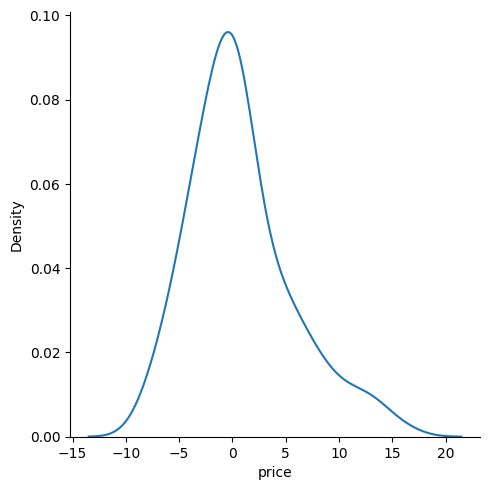

In [46]:
sns.displot(error,kind='kde')

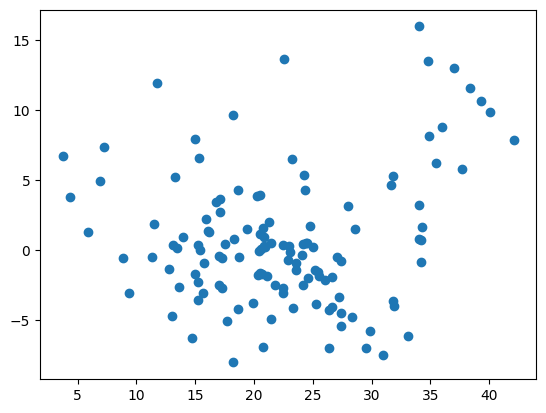

In [48]:
plt.scatter(reg_pred,error) # residual plot

performance matrix

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(yTest,reg_pred))
print(mean_squared_error(yTest,reg_pred))
print(np.sqrt(mean_squared_error(yTest,reg_pred)))

3.556728980646818
23.595997304292766
4.857571132190734


r square and adjusted square

r_square(coef of determination) = 1- [(sum of squares of error)/(total sum of squares)]


adjusted_r_square = 1 - [(1-r_square)*(n-1)/(n-k-1)]
n - no of obs
k  - no of predictor variable

In [53]:
from sklearn.metrics import r2_score
score = r2_score(yTest,reg_pred)
score
# more towards the 1 more better model is

0.7617972854111486

In [55]:
score2 = 1-((1-score)*(len(yTest)-1)/(len(yTest)-xTest.shape[1]-1))
score2

0.7343934332903073

New data Prediction

In [71]:
data = dataset.iloc[0,:-1].values
data = data.reshape(1,-1)
data.shape



(1, 13)

In [74]:
data = scalar.fit_transform(data)

In [75]:
reg.predict(data)

array([22.34459103])

Pickling the model for deployment

In [76]:
import pickle

In [78]:
pickle.dump(reg, open("regModel.pkl",'wb'))

In [80]:
pickle_model = pickle.load(open("regModel.pkl",'rb'))